# Lab | Intro to Probability

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, geom, poisson, norm, expon

**Objective**

Welcome to this Intro to Probability lab, where we explore decision-making scenarios through the lens of probability and strategic analysis. In the business world, making informed decisions is crucial, especially when faced with uncertainties. This lab focuses on scenarios where probabilistic outcomes play a significant role in shaping strategies and outcomes. Students will engage in exercises that require assessing and choosing optimal paths based on data-driven insights. The goal is to enhance your skills by applying probability concepts to solve real-world problems.

**Challenge 1**

#### Ironhack Airlines 

Often Airlines sell more tickets than they have seats available, this is called overbooking. Consider the following:
- A plane has 450 seats. 
- Based on historical data we conclude that each individual passenger has a 3% chance of missing it's flight. 

If the Ironhack Airlines routinely sells 460 tickets, what is the chance that they have a seats for all passenger?

In [6]:
n = 460       
p = 0.97      
p_450_seats = binom.cdf(450, n, p)
print(f"Chance to have enough seats for all passengers: {p_450_seats:.4f}")

Chance to have enough seats for all passengers: 0.8845


**Challenge 2**

#### Ironhack Call Center 

Suppose a customer service representative at a call center is handling customer complaints. Consider the following:
- The probability of successfully resolving a customer complaint on the first attempt is 0.3. 


What is the probability that the representative needs to make at least three attempts before successfully resolving a customer complaint?

In [10]:
p = 0.30
k = 2
prob = 1 - geom.cdf(k, p)
print(f"Probability of successfully resolving a customer complaint on at least three attempts: {prob:.4f}")

Probability of successfully resolving a customer complaint on at least three attempts: 0.4900


**Challenge 3**

#### Ironhack Website

Consider a scenario related to Ironhack website traffic. Where:
- our website takes on average 500 visits per hour.
- the website's server is designed to handle up to 550 vists per hour.


What is the probability of the website server being overwhelmed?

In [14]:
lmbda = 500  
k = 550      
prob_overwhelmed_1_h = 1 - poisson.cdf(k, lmbda)
print(f"The probability of the server being overwhelmed is: {prob_overwhelmed_1_h:.4f}")

The probability of the server being overwhelmed is: 0.0129


What is the probability of being overwhelmed at some point during a day? (consider 24hours)

In [16]:
prob_overwhelmed_24_h = 1 - (1 - prob_overwhelmed_1_h) ** 24
print(f"The probability of the server being overwhelmed at some point during a day is: {prob_overwhelmed_24_h:.4f}")

The probability of the server being overwhelmed at some point during a day is: 0.2677


**Challenge 4**

#### Ironhack Helpdesk

Consider a scenario related to the time between arrivals of customers at a service desk.

On average, a customers arrives every 10minutes.

What is the probability that the next customer will arrive within the next 5 minutes?

In [20]:
lambda_param = 1/10
t = 5  
prob = expon.cdf(t, scale= 1/lambda_param)
print(f"The probability that the next customer will arrive w/in the next 5 minutes is {prob:.4f}")

The probability that the next customer will arrive w/in the next 5 minutes is 0.3935


If there is no customer for 15 minutes, employees can that a 5 minutes break.

What is the probability an employee taking a break?

In [22]:
lambda_param = 0.1  
t = 15  
prob_15_min = expon.cdf(t, scale= 1/lambda_param)
print(f"The probability of no customer in the next 15 minutes is {1 - prob_15_min:.4f}")

The probability of no customer in the next 15 minutes is 0.2231


In [23]:
# or easier w/survival function instead of CDF
lambda_param = 0.1 
t = 15  
prob_15_min = expon.sf(t, scale= 1/lambda_param)
print(f"The probability of no customer in the next 15 minutes is {prob_15_min:.4f}")

The probability of no customer in the next 15 minutes is 0.2231


**Challenge 5**

The weights of a certain species of birds follow a normal distribution with a mean weight of 150 grams and a standard deviation of 10 grams. 

- If we randomly select a bird, what is the probability that its weight is between 140 and 160 grams?

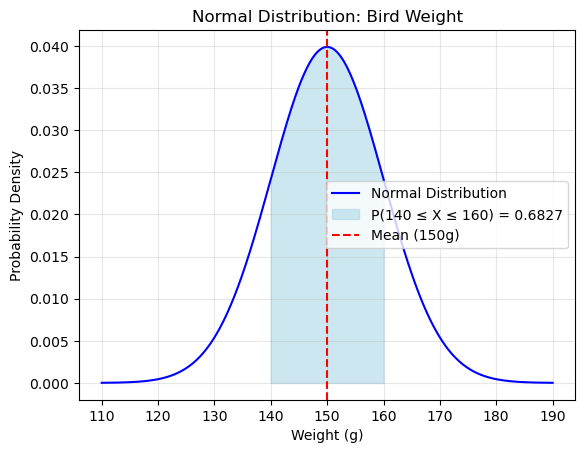

The probability of a bird's weight being between 140 and 160 g is 0.6827


In [26]:
mean = 150
std = 10
norm_dist = norm(loc = mean, scale = std)

x = np.linspace(mean - 4*std, mean + 4*std, 500)
y = norm.pdf(x, loc=mean, scale=std)

x_fill = np.linspace(140, 160, 500)
y_fill = norm.pdf(x_fill, loc=mean, scale=std)

prob = norm.cdf(160, loc=mean, scale=std) - norm.cdf(140, loc=mean, scale=std)

plt.plot(x, y, label='Normal Distribution', color='blue')
plt.fill_between(x_fill, y_fill, color='lightblue', alpha=0.6, label=f"P(140 ≤ X ≤ 160) = {prob:.4f}")
plt.axvline(mean, color='red', linestyle='--', label='Mean (150g)')

plt.title("Normal Distribution: Bird Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"The probability of a bird's weight being between 140 and 160 g is {norm_dist.cdf(160) - norm_dist.cdf(140):.4f}")

**Challenge 6**

If the lifetime (in hours) of a certain electronic component follows an exponential distribution with a mean lifetime of 50 hours, what is the probability that the component fails within the first 30 hours?

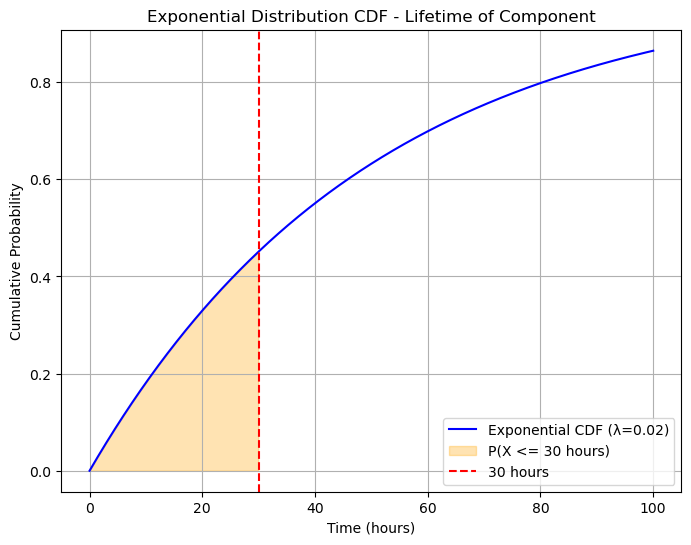

The probability that the component will fail w/in the first 30 hrs is 0.4512


In [29]:
lambda_param = 1 / 50  
t = 30  
failure_prob = expon.cdf(t, scale=1/lambda_param)

x = np.linspace(0, 100, 1000)

cdf_values = expon.cdf(x, scale=1/lambda_param)

plt.figure(figsize=(8, 6))
plt.plot(x, cdf_values, label="Exponential CDF (λ=0.02)", color="blue")

plt.fill_between(x, 0, cdf_values, where=(x <= t), color='orange', alpha=0.3, label=f'P(X <= {t} hours)')

plt.axvline(x=t, color='red', linestyle='--', label=f'{t} hours')

plt.title("Exponential Distribution CDF - Lifetime of Component")
plt.xlabel("Time (hours)")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.show()

print(f"The probability that the component will fail w/in the first 30 hrs is {failure_prob:.4f}")